Port of Seattle Data

Vietnam Washington Trade Data

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [161]:
folder_path = "C:/Users/miaca/OneDrive/Desktop/Vietnam Wash Proj"

In [177]:
df2_sts = pd.read_csv("C:/Users/miaca/OneDrive/Desktop/Port-level Imports (10).csv")
df_2 = pd.read_csv("C:/Users/miaca/OneDrive/Desktop/Port-level Imports (4).csv") #imports to seattle from vietnam 2 dig hs
df_2_allImports=pd.read_csv("C:/Users/miaca/OneDrive/Desktop/Port-level Imports (5).csv") #imports to seattle global total 2 dig hs
df_2

,Port,Commodity,Country,Time,Customs Value (Gen) ($US)
0,"Seattle, WA (Port)",02 Meat And Edible Meat Offal,Vietnam,2004,"5,124"
1,"Seattle, WA (Port)","03 Fish, Crustaceans & Aquatic Invertebrates",Vietnam,2003,"2,641,173"
2,"Seattle, WA (Port)","03 Fish, Crustaceans & Aquatic Invertebrates",Vietnam,2004,"4,416,042"
3,"Seattle, WA (Port)","03 Fish, Crustaceans & Aquatic Invertebrates",Vietnam,2005,"4,422,097"
4,"Seattle, WA (Port)","03 Fish, Crustaceans & Aquatic Invertebrates",Vietnam,2006,"4,464,972"
...,...,...,...,...,...
1311,"Seattle, WA (Port)","98 Special Classification Provisions, Nesoi",Vietnam,2020,"443,787"
1312,"Seattle, WA (Port)","98 Special Classification Provisions, Nesoi",Vietnam,2021,"1,510,057"
1313,"Seattle, WA (Port)","98 Special Classification Provisions, Nesoi",Vietnam,2022,"6,240,764"
1314,"Seattle, WA (Port)","98 Special Classification Provisions, Nesoi",Vietnam,2023,"2,750,729"


In [163]:
def clean(df):
    df['Time'] = df['Time'].replace("2024 through July", "2024")
    #df.drop(index = [0,1,2,3,4,5], inplace = True)
    df.reset_index()
    df = df.loc[:, ["Commodity", "Time", "Customs Value (Gen) ($US)"]]
    
    #df["Commodity"] = df["Commodity"].str[0:6]
    df["Customs Value (Gen) ($US)"] = df["Customs Value (Gen) ($US)"]/1000000
    
    pivoted_df = df.pivot(index="Commodity", columns = "Time", values = "Customs Value (Gen) ($US)")

    pivoted_df = pivoted_df.fillna(0)
    return pivoted_df

In [164]:
def addTotalCol(df):
    df["Total"] = df.sum(axis=1)
    return df

First, I am using the 2 digit HS codes for imports from Vietnam. I create two metrics, a column representing total amount traded over all years (Total) and one representing the quantity traded in the past two years (2324).

In [165]:

df_2_allImports = clean(df_2_allImports)




TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [178]:
df2_sts["Customs Value (Gen) ($US)"] = pd.to_numeric(df2_sts["Customs Value (Gen) ($US)"].str.replace(',',''))
aggregated_df = df2_sts.groupby(['Commodity', 'Time'], as_index=False)['Customs Value (Gen) ($US)'].sum()
cleaned_agg_df = clean(aggregated_df)
cleaned_agg_df = addTotalCol(cleaned_agg_df)
cleaned_agg_df["2324"] = cleaned_agg_df["2024"] + cleaned_agg_df["2023"]
cleaned_agg_df


Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,2324
Commodity,,,,,,,,,,,,,,,,,,,,,
02 Meat And Edible Meat Offal,0.000000,0.005124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005124,0.000000
"03 Fish, Crustaceans & Aquatic Invertebrates",6.791411,6.543822,6.399272,5.515588,5.507290,6.531339,3.521444,7.364107,11.262592,9.218910,...,8.424018,9.943434,7.799840,10.953112,6.191166,14.717423,7.824366,4.048816,185.295792,11.873182
04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi,0.346077,0.344182,0.296708,0.851857,0.221595,0.260760,0.530342,0.347745,0.193500,0.000000,...,3.726399,2.884485,0.994293,0.193343,1.344957,0.459424,0.000000,1.515817,16.862340,1.515817
"05 Products Of Animal Origin, Nesoi",0.000000,0.006000,0.022500,0.029600,0.011000,0.063000,0.062000,0.028297,0.029205,0.024840,...,0.113424,0.053095,0.000000,0.032571,0.049682,1.442948,0.133641,0.000000,2.223973,0.133641
"06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016831,0.000000,0.000000,...,0.000000,0.006345,0.096284,0.221080,0.136305,0.031626,0.425645,0.218387,1.152503,0.644032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"94 Furnit;bedding,mattres;luminaires,light Fix;prefab",6.901167,16.894862,32.594277,38.163033,48.884068,29.254617,33.102178,62.235829,62.717221,70.213953,...,56.342418,44.479070,58.963810,130.158645,226.189840,410.904498,226.022050,157.028406,1990.360849,383.050456
"95 Toys, Games & Sport Equipment; Parts & Accessories",0.396327,0.414277,0.877165,1.446183,3.019226,3.065331,10.050043,9.250078,5.235794,7.001757,...,20.319471,9.393003,5.892075,16.213450,126.739514,299.119743,131.914209,56.654410,799.903749,188.568619
96 Miscellaneous Manufactured Articles,0.158743,0.260352,0.530472,0.467343,0.467857,0.321844,0.565998,0.538239,1.554865,1.095253,...,0.401950,0.893424,1.422112,1.673261,2.049367,3.094651,0.838825,1.225408,19.971366,2.064233


In [150]:
df_2_allImports["Customs Value (Gen) ($US)"] = pd.to_numeric(df_2_allImports["Customs Value (Gen) ($US)"].str.replace(',',''))
cleaned_df_2_allImports = clean(df_2_allImports)
cleaned_df_2_allImports = addTotalCol(cleaned_df_2_allImports)
cleaned_df_2_allImports["2324"] = cleaned_df_2_allImports["2024"] + cleaned_df_2_allImports["2023"]

In [140]:
cleaned_agg_df.to_csv(os.path.join(folder_path, "bothportsVietnamImports.csv"))

In [151]:
sums = cleaned_agg_df.sum()
cleaned_agg_df.loc["sums"] = sums
cleaned_agg_df


Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,2324
Commodity,,,,,,,,,,,,,,,,,,,,,
02 Meat And Edible Meat Offal,0.000000,0.005124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005124,0.000000
"03 Fish, Crustaceans & Aquatic Invertebrates",6.791411,6.543822,6.399272,5.515588,5.507290,6.531339,3.521444,7.364107,11.262592,9.218910,...,8.424018,9.943434,7.799840,10.953112,6.191166,14.717423,7.824366,4.048816,185.295792,11.873182
04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi,0.346077,0.344182,0.296708,0.851857,0.221595,0.260760,0.530342,0.347745,0.193500,0.000000,...,3.726399,2.884485,0.994293,0.193343,1.344957,0.459424,0.000000,1.515817,16.862340,1.515817
"05 Products Of Animal Origin, Nesoi",0.000000,0.006000,0.022500,0.029600,0.011000,0.063000,0.062000,0.028297,0.029205,0.024840,...,0.113424,0.053095,0.000000,0.032571,0.049682,1.442948,0.133641,0.000000,2.223973,0.133641
"06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016831,0.000000,0.000000,...,0.000000,0.006345,0.096284,0.221080,0.136305,0.031626,0.425645,0.218387,1.152503,0.644032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 Toys, Games & Sport Equipment; Parts & Accessories",0.396327,0.414277,0.877165,1.446183,3.019226,3.065331,10.050043,9.250078,5.235794,7.001757,...,20.319471,9.393003,5.892075,16.213450,126.739514,299.119743,131.914209,56.654410,799.903749,188.568619
96 Miscellaneous Manufactured Articles,0.158743,0.260352,0.530472,0.467343,0.467857,0.321844,0.565998,0.538239,1.554865,1.095253,...,0.401950,0.893424,1.422112,1.673261,2.049367,3.094651,0.838825,1.225408,19.971366,2.064233
"97 Works Of Art, Collectors' Pieces And Antiques",0.004008,0.003426,0.017585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005946,0.000000,0.000000,0.000000,0.003551,0.002250,0.000000,0.080009,0.002250


In [158]:
cleaned_agg_df_pcts = cleaned_agg_df.div(cleaned_agg_df.loc['sums'], axis=1) * 100
cleaned_agg_df_pcts.to_csv(os.path.join(folder_path, "pctYearlyImportsFromVietnam.csv"))

In [159]:
cleaned_agg_df_pcts

Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,2324
Commodity,,,,,,,,,,,,,,,,,,,,,
02 Meat And Edible Meat Offal,0.000000,0.001368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000
"03 Fish, Crustaceans & Aquatic Invertebrates",3.427411,1.747249,1.079790,0.850846,0.711165,0.900409,0.440349,0.758748,1.068760,0.863208,...,1.171544,1.657060,0.993581,1.056249,0.324010,0.435050,0.309237,0.236165,0.832466,0.279723
04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi,0.174654,0.091899,0.050065,0.131409,0.028615,0.035948,0.066318,0.035829,0.018362,0.000000,...,0.518237,0.480696,0.126658,0.018645,0.070387,0.013581,0.000000,0.088417,0.075756,0.035712
"05 Products Of Animal Origin, Nesoi",0.000000,0.001602,0.003797,0.004566,0.001420,0.008685,0.007753,0.002916,0.002771,0.002326,...,0.015774,0.008848,0.000000,0.003141,0.002600,0.042654,0.005282,0.000000,0.009991,0.003148
"06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001734,0.000000,0.000000,...,0.000000,0.001057,0.012265,0.021320,0.007133,0.000935,0.016822,0.012738,0.005178,0.015173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 Toys, Games & Sport Equipment; Parts & Accessories",0.200014,0.110615,0.148010,0.223091,0.389877,0.422586,1.256736,0.953066,0.496849,0.655606,...,2.825867,1.565332,0.750561,1.563523,6.632823,8.842040,5.213550,3.304621,3.593676,4.442535
96 Miscellaneous Manufactured Articles,0.080113,0.069516,0.089510,0.072093,0.060415,0.044369,0.070777,0.055457,0.147548,0.102554,...,0.055900,0.148888,0.181155,0.161359,0.107252,0.091479,0.033152,0.071477,0.089724,0.048632
"97 Works Of Art, Collectors' Pieces And Antiques",0.002023,0.000915,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000991,0.000000,0.000000,0.000000,0.000105,0.000089,0.000000,0.000359,0.000053


([<matplotlib.patches.Wedge at 0x13d984b3e10>,
 [Text(6.735557395310444e-17, 1.1, '02 Meat And Edible Meat Offal'),
  Text(-0.009666415468870879, 1.0999575266399986, '03 Fish, Crustaceans & Aquatic Invertebrates'),
  Text(-0.020565982379278907, 1.09980772881844, '04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi'),
  Text(-0.02190863663803088, 1.0997818018319192, '05 Products Of Animal Origin, Nesoi'),
  Text(-0.022541649139602275, 1.0997690094079153, '06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.'),
  Text(-0.02315958598326144, 1.099756170056383, '07 Edible Vegetables & Certain Roots & Tubers'),
  Text(-0.02743925466852835, 1.0996577137015118, '08 Edible Fruit & Nuts; Citrus Fruit Or Melon Peel'),
  Text(-0.03997363879064818, 1.099273445600245, '09 Coffee, Tea, Mate & Spices'),
  Text(-0.048511132444146475, 1.0989297839393501, '10 Cereals'),
  Text(-0.04873733980605183, 1.098919774919275, '11 Milling Products; Malt; Starch; Inulin; Wht Gluten'),
  Text(-0.048926748666939274,

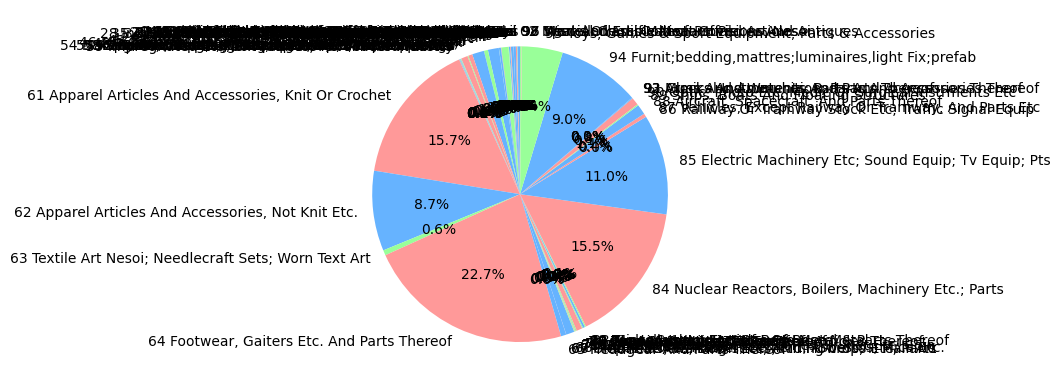

In [173]:
cleaned_agg_df_pcts=cleaned_agg_df_pcts.iloc[:-1,:]
plt.pie(cleaned_agg_df_pcts["2324"], labels=cleaned_agg_df_pcts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

In [95]:
desired_rows = list(set(cleaned_df_2_allImports.index) - set(cleaned_agg_df.index))
filtered_df2_allImports =cleaned_df_2_allImports.drop(desired_rows) 


In [96]:
final_df_total = filtered_df2_allImports.replace(0, pd.NA)
final_df = (cleaned_agg_df / final_df_total) *100
final_df
#final_df.to_csv(os.path.join(folder_path, 'totalImportsPercents.csv'))

Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,2324
Commodity,,,,,,,,,,,,,,,,,,,,,
02 Meat And Edible Meat Offal,0.000000,0.005505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000251,0.000000
"03 Fish, Crustaceans & Aquatic Invertebrates",3.123730,2.952074,2.066737,1.545554,1.195976,1.553492,0.910462,1.678312,2.575194,2.283419,...,2.025183,2.329846,1.669133,2.155033,0.979057,3.334868,3.110256,2.864888,2.183466,3.021996
04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi,8.880038,14.547479,11.589871,9.581444,5.920112,10.467102,14.330039,5.873366,5.331823,0.000000,...,48.772354,28.419255,9.713482,2.619765,12.037960,4.234507,0.0,3.149910,9.666443,2.429209
"05 Products Of Animal Origin, Nesoi",0.000000,0.010725,0.052589,0.096432,0.032917,0.189769,0.224715,0.060605,0.079817,0.079648,...,0.334710,0.20841,0.000000,0.337443,0.402320,7.100016,0.897826,0.000000,0.362550,0.636124
"06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.493194,0.000000,0.000000,...,0.000000,0.084807,1.237140,2.708330,1.888691,0.569774,12.545523,9.202372,1.309330,11.169546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"94 Furnit;bedding,mattres;luminaires,light Fix;prefab",0.880280,1.658687,2.553143,3.073399,3.620922,2.716545,3.042699,3.405075,4.017526,4.723442,...,4.387349,3.091444,5.543572,12.443118,15.130844,24.201393,24.909107,30.718397,7.436364,27.002499
"95 Toys, Games & Sport Equipment; Parts & Accessories",0.020264,0.018342,0.037795,0.071859,0.070881,0.053944,0.199775,0.265146,0.222715,0.355380,...,2.497389,0.922177,0.534640,1.359325,8.580597,22.221561,19.423391,15.508672,1.864986,18.054187
96 Miscellaneous Manufactured Articles,0.149623,0.231234,0.388490,0.348992,0.353001,0.259847,0.448944,0.282066,0.962771,0.715046,...,0.493353,0.741153,1.539372,2.549464,2.301598,2.794807,1.015464,2.983937,0.855481,1.669120


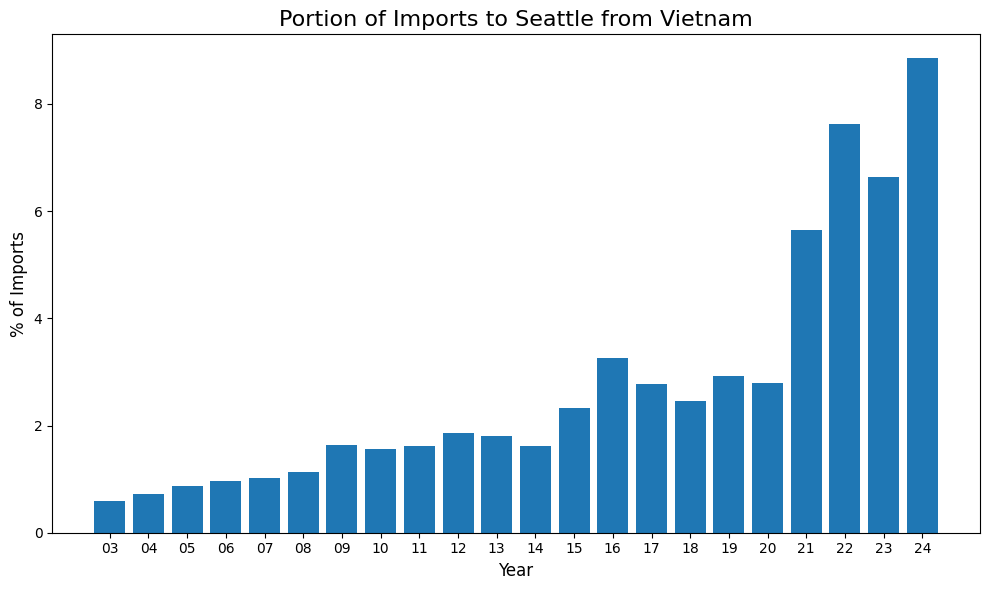

In [97]:
col_avgs = final_df.iloc[:,:-2].mean()
col_avgs
plt.figure(figsize=(10, 6))
plt.bar(col_avgs.index, col_avgs.values)

formatted_labels = [str(year)[-2:] for year in col_avgs.index]
plt.xticks(ticks=range(len(formatted_labels)), labels=formatted_labels)

# Add title and labels
plt.title('Portion of Imports to Seattle from Vietnam', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('% of Imports', fontsize=12)


# Display the plot
plt.tight_layout()

plt.savefig(os.path.join(folder_path, 'totalImportPercents.png'))
plt.show()

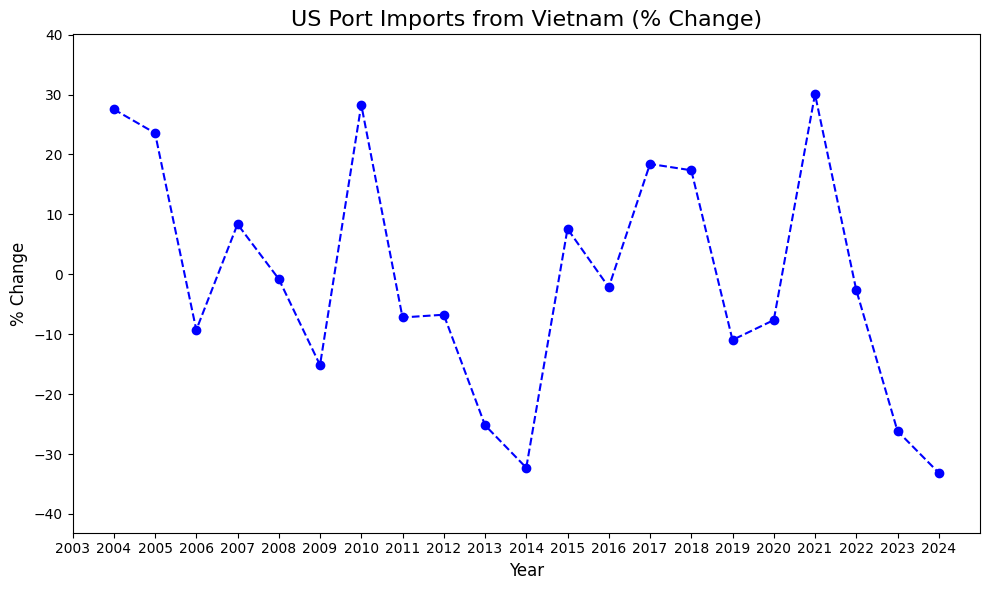

In [116]:
yearly_totals = cleaned_df_2_allImports.sum(axis=0)
yearly_totals_pct = yearly_totals.pct_change() * 100
yearly_totals_pct = yearly_totals_pct.iloc[:-2]

# Plot the percentage change
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals_pct.index, yearly_totals_pct.values, marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('US Port Imports from Vietnam (% Change)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('% Change', fontsize=12)

# Optionally adjust y-axis limits (based on your data)
plt.ylim([yearly_totals_pct.min() - 10, yearly_totals_pct.max() + 10])

# Display the plot
plt.tight_layout()
plt.savefig(os.path.join(folder_path, "portImportsFromVietnam"))
plt.show()